Import required Libraries

In [13]:
import csv
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

print(tf.__version__)

2.0.0


In [2]:
# Change working directory to C://Practicuum Project 2//BBCTextClassification
import os
os.chdir('C://Practicuum Project 2//BBCTextClassification/data')
print(os.getcwd())

C:\Practicuum Project 2\BBCTextClassification\data


Set Hyperparameters

In [3]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = 'unknown'
training_portion = .8


In [6]:
# load the dataset 

bbc_data=pd.read_csv('bbc-text.csv', ',')

In [7]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
bbc_data['text_without_stopwords'] = bbc_data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(bbc_data.head())

bbc_data['text_without_stopwords'] = bbc_data['text_without_stopwords'] .str.lower()

        category                                               text  \
0           tech  tv future in the hands of viewers with home th...   
1       business  worldcom boss  left books alone  former worldc...   
2          sport  tigers wary of farrell  gamble  leicester say ...   
3          sport  yeading face newcastle in fa cup premiership s...   
4  entertainment  ocean s twelve raids box office ocean s twelve...   

                              text_without_stopwords  
0  tv future hands viewers home theatre systems p...  
1  worldcom boss left books alone former worldcom...  
2  tigers wary farrell gamble leicester say rushe...  
3  yeading face newcastle fa cup premiership side...  
4  ocean twelve raids box office ocean twelve cri...  


In [9]:
train_size = int(len(bbc_data) * .8)

def train_test_split(data, train_size):
    train = bbc_data[:train_size]
    test = bbc_data[train_size:]
    return train, test

train, test = train_test_split(bbc_data, train_size)

train_cat=train['category']
test_cat=test['category']
train_text=train['text_without_stopwords']
#train_text=train['text_with_stemming']
test_text=test['text_without_stopwords']
#test_text=test['text_with_stemming']

Define two lists containing articles and labels. In the meantime, we remove stopwords.

In [19]:
#bbc_data = []
articles = []
labels = []

In [11]:
with open("bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        data = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            data= data.replace(token, ' ')
            data = data.replace(' ', ' ')
        bbc_data.append(data)
print(len(labels))
print(len(bbc_data))

2225
2225


In [20]:
with open("bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labels))
print(len(articles))

2225
2225


In [13]:
train_size = int(len(bbc_data) * .8)
print ("Train size: %d" % train_size)

print ("Test size: %d" % (len(bbc_data) - train_size))

Train size: 1780
Test size: 445


In [14]:
def train_test_split(data, train_size):
    train = bbc_data[:train_size]
    test = bbc_data[train_size:]
    return train, test

In [16]:
train, test = train_test_split(bbc_data, train_size)

In [18]:
test

['hobbit picture  four years away  lord rings director peter jackson said four years starts work film version hobbit.  oscar winner said visit sydney  desire  make  lengthy negotiations.  think gonna lot lawyers sitting room trying thrash deal ever happen   said new zealander. rights jrr tolkien book split two major film studios. jackson  currently filming remake hollywood classic king kong  said thought sale mgm studios sony corporation would cast uncertainty project. 43-year-old australian city visit lord rings exhibition  attracted 140 000 visitors since opened december.  film-maker recently sued film company new line cinema undisclosed damages alleged withheld profits lost revenue first part middle earth trilogy. fellowship ring 2001 went make worldwide profits $291 million (Â£152 million). jackson thought secured lucrative film directing deal history remake king kong  currently production wellington. picture  stars naomi watts oscar winner adrien brody  due released december. jack

In [23]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

1780
1780
1780
445
445


In our articles that it was tokenizing, it will take 5,000 most common words. oov_token is to put a special value in when an unseen word is encountered. This means we want <OOV> to be used for words that are not in the word_index. fit_on_text

In [14]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
#tokenizer.fit_on_texts(train_articles)
tokenizer.fit_on_texts(train_text)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

{'unknown': 4721,
 'said': 2,
 'mr': 3,
 'would': 4,
 'year': 5,
 'also': 6,
 'people': 7,
 'new': 8,
 'us': 9,
 'one': 10}

unknow the oov_token is the most common token , followed by “said”, followed by “mr” and so on. After tokenization, the next step is to turn those tokens into lists of sequence. The following is the 2nd article in the training data that has been turned into sequences or encoded words into numbers

In [16]:
train_sequences = tokenizer.texts_to_sequences(train_text)
print(train_sequences[1])

[1853, 558, 222, 1854, 1336, 119, 1853, 558, 4721, 1621, 673, 4721, 4721, 1900, 1901, 750, 262, 24, 2563, 1261, 4288, 23, 4979, 336, 4721, 24, 785, 4289, 845, 1779, 4104, 3, 1621, 1424, 1853, 350, 181, 45, 4498, 600, 2107, 572, 1817, 3154, 1234, 67, 270, 3, 4721, 102, 3059, 1398, 750, 4721, 2107, 457, 845, 1482, 4721, 4721, 1157, 2492, 3380, 1961, 821, 4721, 408, 3, 4721, 351, 1576, 3, 1621, 21, 2563, 192, 1528, 3, 4721, 3523, 351, 177, 3, 1621, 21, 2563, 1962, 1853, 1854, 3, 4721, 4721, 3523, 4288, 3, 4721, 758, 2793, 2009, 2563, 4499, 3783, 119, 1853, 116, 308, 1461, 1500, 1108, 845, 1779, 484, 4721, 3, 1108, 758, 750, 4721, 242, 542, 4721, 365, 1853, 2563, 257, 678, 3, 1621, 139, 721, 321, 4721, 4721, 558, 4721, 4721, 4721, 1483, 2010, 4721, 3, 1621, 4721, 1853, 4721, 4721, 4721, 1619, 638, 3784, 4721, 561, 2165, 1853, 350, 4721, 79, 514, 805, 1619, 2718, 4721, 608, 67, 1622, 4498, 1127, 255, 4721, 229, 31, 775, 255, 388, 3, 1621, 542, 94, 12, 15, 115, 199, 1398, 119, 4721, 1196, 35

When we train neural networks for NLP, we need sequences to be in the same size, that’s why we use padding. If you look up, our max_length is 200, so we use pad_sequences to make all of our articles the same length which is 200. As a result, you will see that the 1st article was 426 in length, it becomes 200, the 2nd article was 192 in length, it becomes 200, and so on. We do lose some data here but makes the input consistent.

tf.keras.preprocessing.sequence.pad_sequences function transforms a list (of length num_samples) of sequences (lists of integers) into a 2D Numpy array of shape (num_samples, num_timesteps). num_timesteps is either the maxlen argument if provided, or the length of the longest sequence in the list.

Arguments Used: 
sequences	List of sequences (each sequence is a list of integers) > train_sequences

maxlen	Optional Int, maximum length of all sequences. If not provided, sequences will be padded to the length of the longest individual sequence. We use 200 here

dtype	(Optional, defaults to int32). Type of the output sequences. To pad sequences with variable length strings, you can use object.

padding	String, 'pre' or 'post' (optional, defaults to 'pre'): pad either before or after each sequence > We are using post here

truncating	String, 'pre' or 'post' (optional, defaults to 'pre'): remove values from sequences larger than maxlen, either at the beginning or at the end of the sequences. > We are using post here

value	Float or String, padding value. (Optional, defaults to 0.) > We are using default here


In [17]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

425
200
192
200
186
200


In [18]:
print(train_padded[1])

[1853  558  222 1854 1336  119 1853  558 4721 1621  673 4721 4721 1900
 1901  750  262   24 2563 1261 4288   23 4979  336 4721   24  785 4289
  845 1779 4104    3 1621 1424 1853  350  181   45 4498  600 2107  572
 1817 3154 1234   67  270    3 4721  102 3059 1398  750 4721 2107  457
  845 1482 4721 4721 1157 2492 3380 1961  821 4721  408    3 4721  351
 1576    3 1621   21 2563  192 1528    3 4721 3523  351  177    3 1621
   21 2563 1962 1853 1854    3 4721 4721 3523 4288    3 4721  758 2793
 2009 2563 4499 3783  119 1853  116  308 1461 1500 1108  845 1779  484
 4721    3 1108  758  750 4721  242  542 4721  365 1853 2563  257  678
    3 1621  139  721  321 4721 4721  558 4721 4721 4721 1483 2010 4721
    3 1621 4721 1853 4721 4721 4721 1619  638 3784 4721  561 2165 1853
  350 4721   79  514  805 1619 2718 4721  608   67 1622 4498 1127  255
 4721  229   31  775  255  388    3 1621  542   94   12   15  115  199
 1398  119 4721 1196 3524 1938 2493 4722 2357 4721    0    0    0    0
    0 

Then we do the same for the validation sequences.

In [19]:
validation_sequences = tokenizer.texts_to_sequences(test_text)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 200)


Now we are going to look at the labels. Because our labels are text, so we will tokenize them. training, labels are expected to be numpy arrays. So we will turn list of labels into numpy arrays

In [54]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(train_cat)

#training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))

#validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_cat))

validation_label_seq = np.array(label_tokenizer.texts_to_sequences(test_cat))


print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[5]
[2]
[1]
(1780, 1)
[4]
[5]
[3]
(445, 1)


In [20]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(train_cat)
y_train = encoder.transform(train_cat)
y_test = encoder.transform(test_cat)

Before training deep neural network, we should explore what our original article and article after padding look like. Running the following code, we explore the 11th article, we can see that some words become “<OOV>”, because they did not make to the top 5,000.

In [22]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_text[10])

berlin unknown anti nazi film german movie anti nazi unknown unknown drawn unknown unknown berlin film festival unknown unknown final days unknown final days member white rose movement unknown 21 arrested unknown brother hans unknown unknown unknown unknown unknown tyranny unknown unknown director marc unknown said feeling responsibility keep legacy unknown going must unknown keep ideas alive added film drew unknown unknown unknown unknown trial unknown unknown unknown east germany secret police discovery unknown behind film unknown worked closely unknown relatives including one unknown sisters ensure historical unknown film unknown members white rose unknown group first started unknown anti nazi unknown summer unknown arrested dropped unknown munich university calling day unknown unknown unknown regime film unknown six days unknown arrest intense trial saw unknown initially deny charges ended unknown appearance one three german films unknown top prize festival south african film versi

implement LSTM.
We build a tf.keras.Sequential model and start with an embedding layer. An embedding layer stores one vector per word. When called, it converts the sequences of word indices into sequences of vectors. After training, words with similar meanings often have the similar vectors.
The Bidirectional wrapper is used with a LSTM layer, this propagates the input forwards and backwards through the LSTM layer and then concatenates the outputs. This helps LSTM to learn long term dependencies. We then fit it to a dense neural network to do classification.
We use relu in place of tahn function since they are very good alternatives of each other.
We add a Dense layer with 6 units and softmax activation. When we have multiple outputs, softmax converts outputs layers into a probability distribution.

In [23]:

model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    # use ReLU in place of tanh function since they are very good alternatives of each other. Also we used the same for the previous Deep Learning model and want to keep it consistent for comparison
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 394,694
Trainable params: 394,694
Non-trainable params: 0
_________________________________________________________________


In our model summary, we have our embeddings, our Bidirectional contains LSTM, followed by two dense layers. The output from Bidirectional is 128, because it doubled what we put in LSTM. We can also stack LSTM layer if the results are better which was not the case

In [24]:
print(set(labels))

NameError: name 'labels' is not defined

We have 5 labels in total, but because we did not one-hot encode labels, we have to use sparse_categorical_crossentropy as loss function, it seems to think 0 is a possible label as well, while the tokenizer object which tokenizes starting with integer 1, instead of integer 0. As a result, the last Dense layer needs outputs for labels 0, 1, 2, 3, 4, 5 although 0 has never been used.

If you want the last Dense layer to be 5, you will need to subtract 1 from the training and validation labels. 

train 10 epochs

In [25]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 10
#history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)
history = model.fit(train_padded, y_train, epochs=num_epochs, validation_data=(validation_padded, y_test), verbose=2)


Train on 1780 samples, validate on 445 samples
Epoch 1/10
1780/1780 - 15s - loss: 1.5904 - accuracy: 0.2635 - val_loss: 1.2802 - val_accuracy: 0.4607
Epoch 2/10
1780/1780 - 9s - loss: 0.9824 - accuracy: 0.5803 - val_loss: 0.7415 - val_accuracy: 0.7034
Epoch 3/10
1780/1780 - 9s - loss: 0.5367 - accuracy: 0.7927 - val_loss: 0.6094 - val_accuracy: 0.8270
Epoch 4/10
1780/1780 - 9s - loss: 0.2360 - accuracy: 0.9270 - val_loss: 0.3963 - val_accuracy: 0.8876
Epoch 5/10
1780/1780 - 9s - loss: 0.1208 - accuracy: 0.9657 - val_loss: 0.4189 - val_accuracy: 0.8629
Epoch 6/10
1780/1780 - 10s - loss: 0.0620 - accuracy: 0.9843 - val_loss: 0.3559 - val_accuracy: 0.9034
Epoch 7/10
1780/1780 - 10s - loss: 0.0075 - accuracy: 0.9994 - val_loss: 0.3673 - val_accuracy: 0.9146
Epoch 8/10
1780/1780 - 9s - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3822 - val_accuracy: 0.9124
Epoch 9/10
1780/1780 - 10s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.3971 - val_accuracy: 0.9146
Epoch 10/10
1780/1780 - 10s - l

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 394,694
Trainable params: 394,694
Non-trainable params: 0
_________________________________________________________________


In [26]:
import matplotlib.pyplot as plt

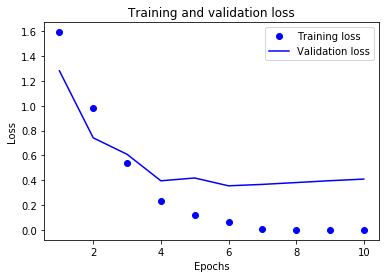

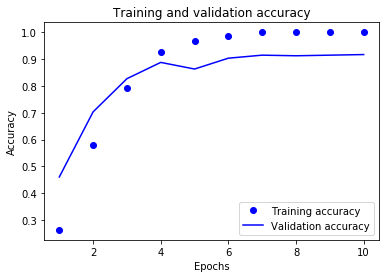

In [27]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#test_loss, test_acc = model.evaluate(test_images, test_labels_cat)

In [37]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = ['business','entertainment','politics','sport','tech']
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['business' 'entertainment' 'politics' 'sport' 'tech']
[0 1 2 3 4]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
['business']


C:\Users\tabas\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [40]:
# prepare output data
y_train_enc, y_test_enc = prepare_targets(train_cat,test_cat)

In [43]:
y_test_enc.shape

(445,)

In [61]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 10
history = model.fit(train_padded, y_train, epochs=num_epochs,validation_split=0.1, verbose=2)


Train on 1602 samples, validate on 178 samples
Epoch 1/10
1602/1602 - 15s - loss: 0.0017 - accuracy: 0.9994 - val_loss: 3.1447e-05 - val_accuracy: 1.0000
Epoch 2/10
1602/1602 - 9s - loss: 0.0035 - accuracy: 0.9988 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 3/10
1602/1602 - 10s - loss: 1.5652e-04 - accuracy: 1.0000 - val_loss: 0.0299 - val_accuracy: 0.9944
Epoch 4/10
1602/1602 - 9s - loss: 1.8683e-05 - accuracy: 1.0000 - val_loss: 0.0301 - val_accuracy: 0.9944
Epoch 5/10
1602/1602 - 9s - loss: 1.3191e-05 - accuracy: 1.0000 - val_loss: 0.0300 - val_accuracy: 0.9944
Epoch 6/10
1602/1602 - 9s - loss: 9.0770e-06 - accuracy: 1.0000 - val_loss: 0.0301 - val_accuracy: 0.9944
Epoch 7/10
1602/1602 - 9s - loss: 6.5305e-06 - accuracy: 1.0000 - val_loss: 0.0304 - val_accuracy: 0.9944
Epoch 8/10
1602/1602 - 9s - loss: 7.7028e-06 - accuracy: 1.0000 - val_loss: 0.0306 - val_accuracy: 0.9944
Epoch 9/10
1602/1602 - 10s - loss: 4.6494e-06 - accuracy: 1.0000 - val_loss: 0.0307 - val_accuracy: 0.9944


In [64]:
# Evaluate the accuracy of our trained model
score = model.evaluate(validation_padded, y_test,
                       batch_size=128, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

445/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test loss: 0.5493879034278099
Test accuracy: 0.9325843


References: 
https://towardsdatascience.com/multi-class-text-classification-with-lstm-using-tensorflow-2-0-d88627c10a35
https://www.tensorflow.org/tutorials/text/text_classification_rnn